<a href="https://colab.research.google.com/github/FlexTaco/cs370/blob/main/assignments/assignment-1b/assignment1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1
model function:
ŷ(x; w) = $Σ_{j=0}^{m}$ $w_{j}$ * $x^{j}$
\
loss function(Ridge regression + MSE):
L = 1/n $Σ_{i=0}^{n} $(^$y_{i}$ - $y_{i}$)^2 + λ $Σ_{j=1}^{M}$ $w_{j}^{2}$
\
Gradient:
∂L/∂w = L = 1/2n $Σ_{i=0}^{n} $(^$y_{i}$ - $y_{i}$) + λ/2 $Σ_{j=1}^{M}$ $w_{j}$
\
weight formula:
$w_{j}$ = $w_{j}$ - α *∂L/∂$w_{j}$


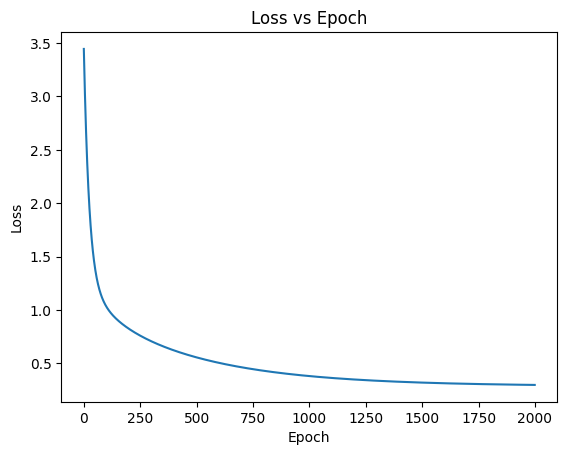

tensor([[-0.3091],
        [-0.0932],
        [ 0.1724],
        [-0.1664],
        [-0.1635],
        [-0.0415],
        [ 0.2010],
        [ 0.0587],
        [ 0.3831]], requires_grad=True)
tensor([-0.1600], requires_grad=True)


In [77]:
import torch
import matplotlib.pyplot as plt


#remake from the notebook but using pytorchj
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = torch.linspace(domain[0], domain[1], sample_size)
    y = func(x) + torch.normal(mean=0, std=1, size=(sample_size,), dtype=torch.float32)
    return x, y

def sinusoidal(x):
    return torch.sin(2 * torch.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_train_unsqueeze = torch.unsqueeze(x_train, dim=1)
x_train_poly = torch.cat([x_train_unsqueeze**i for i in range(1, 9 + 1)], dim=1)
#this didn't work
#x_train_poly = torch.stack([x_train[:, 0]**i for i in range(1, 9 + 1)], dim=1)

#make into tensors
x_train = x_train_poly.float()
y_train = y_train.float().reshape(-1, 1)

weights = torch.randn(9, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

#parameters, come back and edit epoch
learning_rate = 0.01
epochs = 2000
lambda_reg = 0.1


loss_arr = []
for epoch in range(epochs):

  predictions = torch.mm(x_train, weights) + bias

  #adding calculating loss
  errors = predictions - y_train
  mse_loss = torch.mean(errors**2) / 2
  l2_reg = (lambda_reg / 2) * torch.sum(weights**2)
  loss = mse_loss + l2_reg
  loss.backward()

  #recal weights and bias
  with torch.no_grad():
    weights -= learning_rate * weights.grad
    bias -= learning_rate * bias.grad
  weights.grad.zero_()
  bias.grad.zero_()

  loss_arr.append(loss.item())

#loss vs epochs
plt.plot(loss_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

print(weights)
print(bias)

# Logistic Regression

# Task 1

In [87]:
import pandas as pd
import seaborn as sn 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#only loaded 8,000 to get it to work. Can do the whole thing just takes longer.
df = pd.read_csv("/Users/junior/Desktop/cs370course/avazu-ctr-prediction/train.csv",nrows=8000)

#some data exploration
# print(df.info())
# print("Missing", df.isnull().sum())
# print(df.corr(method="pearson"))
# map = sn.heatmap(data=df)

df_cleaned = df.drop(columns=["app_id", "app_domain", "device_model"])

category = ['site_category', 'app_category', 'device_type', 'banner_pos', 'device_conn_type']
numerical = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

#standardization and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('numberical', StandardScaler(), numerical),
        ('category', OneHotEncoder(handle_unknown='ignore'), category)
    ])

X = df_cleaned.drop(columns=['click'])
y = df_cleaned['click']

#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Preprocess data 
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Task 2

L = -1/m $Σ_{i=1}^{m}$ ($y_{i}$ * log(^$y_{i}$) + (1-$y_{i}$) * log(1-^$y_{i}$))
\
s(z) = 1/(1+$e^{-z}$)
\
Precision = True Positives/(False Positives + True Positives)
\
Recall= True Positives/(False Negatives + True Positives)
​

​


/var/folders/94/8ft038r960j57kvtp1ff54f00000gn/T/ipykernel_35784/2688110952.py:32: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = y[i:i + self.batch_size]


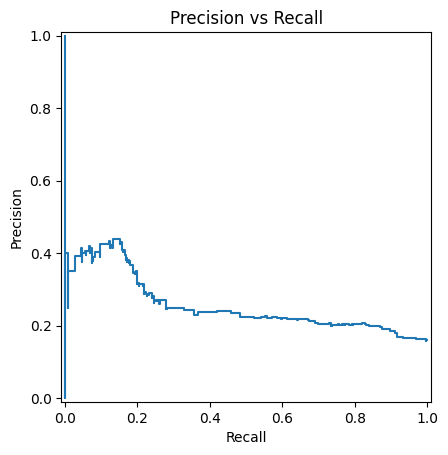

In [88]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

#sigmoid equation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Loss equation
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=64):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        #SGD
        for epoch in range(self.epochs):
            #use mini batch instead of whole to speed up algo
            for i in range(0, n_samples, self.batch_size):
                
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                # Model predictions
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_predicted = sigmoid(linear_model)
                dw = (1 / len(X_batch)) * np.dot(X_batch.T, (y_predicted - y_batch))
                db = (1 / len(X_batch)) * np.sum(y_predicted - y_batch)

                # Update weights
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_pred_prob = self.predict_prob(X)
        return np.where(y_pred_prob >= 0.5, 1, 0)
    
#mkae our model
model = LogisticRegressionSGD(learning_rate=0.01, epochs=1000, batch_size=64)
model.fit(X_train_processed, y_train)

#testing our model to predict y
y_pred_prob = model.predict_prob(X_test_processed)
y_pred = model.predict(X_test_processed)
y_pred[:5], y_pred_prob[:5]
#Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

High Precision, Low Recall occurs when there are more positive predictions but only when it is certain. This will may miss many true positives.

High Recall, Low Precision occurs when there are more positives. It has more true positives but also predicts more false positives.